In [1]:
import os
import warnings
import numpy as np 
import pandas as pd 
import pandas_profiling as pp
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from sklearn.neighbors import KNeighborsRegressor

In [3]:
file_path = '/Users/ojintaek/Desktop/kaggle/cardio_train.csv'

# Load the CSV file with the semicolon delimiter

dataset = pd.read_csv(file_path, sep=';')

In [4]:
dataset.drop('id', inplace=True, axis=1)

In [5]:
dataset

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
def remove_outliers(df, encoded_categorical_columns=None, multiplier=1.5):
    if encoded_categorical_columns is None:
        encoded_categorical_columns = []

    clean_df = df.copy()

    for column in clean_df.columns:
        if pd.api.types.is_numeric_dtype(clean_df[column]) and column not in encoded_categorical_columns:
            Q1 = clean_df[column].quantile(0.25)
            Q3 = clean_df[column].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - (multiplier * IQR)
            upper_bound = Q3 + (multiplier * IQR)

            # Filter out the outliers
            clean_df = clean_df[(clean_df[column] >= lower_bound) & (clean_df[column] <= upper_bound)]

    return clean_df

encoded_categorical_columns = ['gender','cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

clean_df = remove_outliers(dataset, encoded_categorical_columns=encoded_categorical_columns)
dataset = clean_df
dataset

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
5,21914,1,151,67.0,120,80,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [24]:
dataset.to_csv('clean_cardio.csv', index=False)

In [7]:
# Calculate the correlation with diabetes_status
correlations = dataset.corrwith(dataset['cardio'])

# Print the correlations
print(correlations)

age            0.236490
gender        -0.004814
height        -0.027595
weight         0.161721
ap_hi          0.432215
ap_lo          0.336278
cholesterol    0.218223
gluc           0.085730
smoke         -0.022171
alco          -0.012321
active        -0.037674
cardio         1.000000
dtype: float64


In [8]:
data = dataset

Number of samples: 62502
Number of features: 11

Data description:
                age        gender        height        weight         ap_hi  \
count  62502.000000  62502.000000  62502.000000  62502.000000  62502.000000   
mean   19493.750360      1.348581    164.406131     73.181456    126.420339   
std     2458.088341      0.476525      7.531374     12.271998     14.289980   
min    14282.000000      1.000000    143.000000     40.000000     90.000000   
25%    17724.250000      1.000000    159.000000     65.000000    120.000000   
50%    19718.000000      1.000000    165.000000     72.000000    120.000000   
75%    21341.750000      2.000000    170.000000     81.000000    140.000000   
max    23713.000000      2.000000    186.000000    107.000000    170.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  62502.000000  62502.000000  62502.000000  62502.000000  62502.000000   
mean      81.699146      1.357717      1.220649      0.086349  

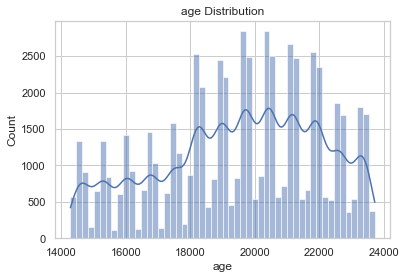

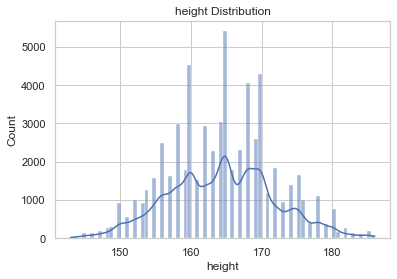

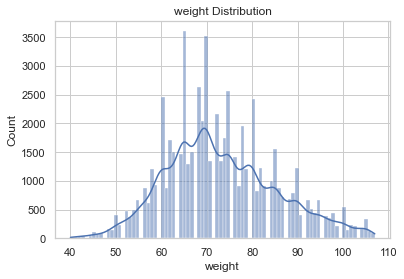

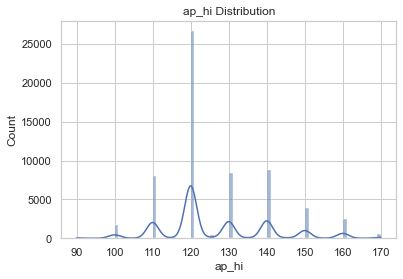

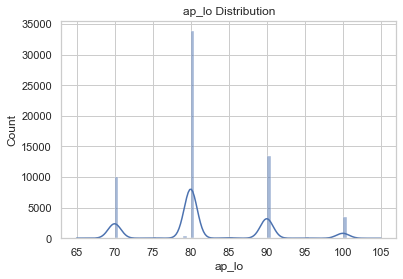

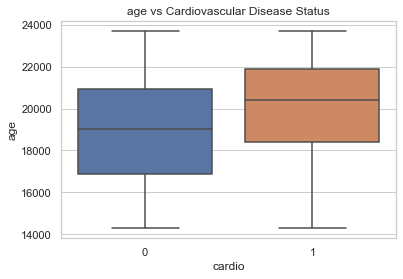

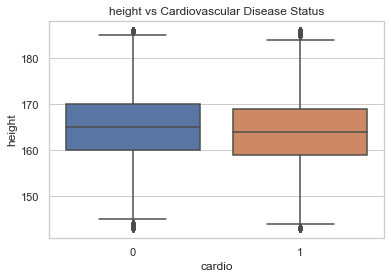

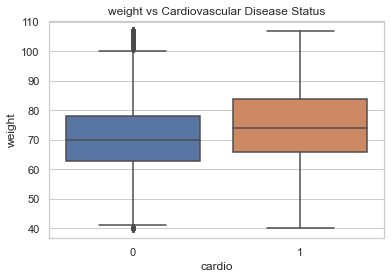

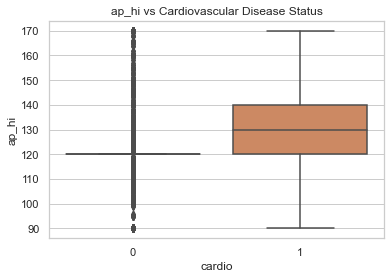

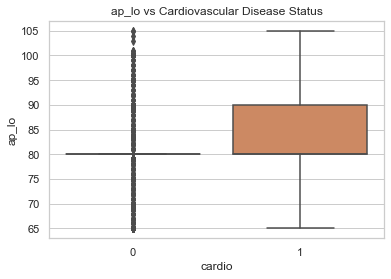

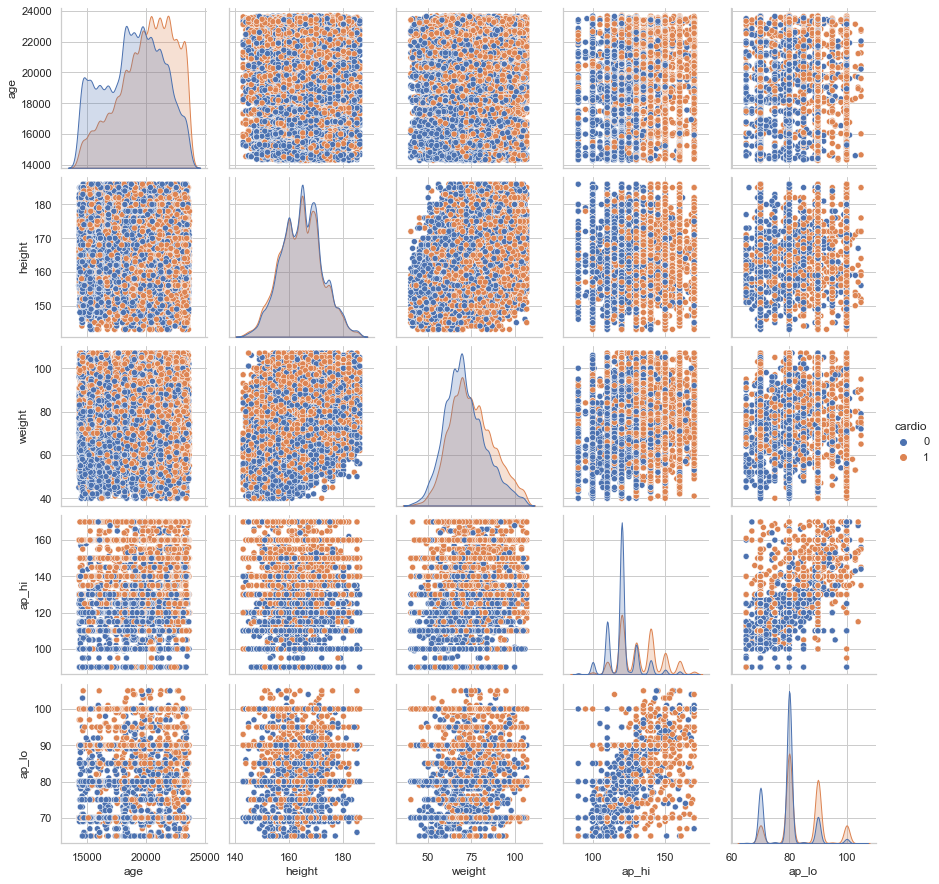

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
print("Number of samples:", data.shape[0])
print("Number of features:", data.shape[1] - 1)  # Subtract 1 to exclude the target variable
print("\nData description:")
print(data.describe())

# Check for missing values
print("\nMissing values:")
print(data.isna().sum())

# Distribution of the target variable
print("\nTarget variable distribution:")
print(data['cardio'].value_counts())

# Visualize the distribution of continuous features
continuous_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
for feature in continuous_features:
    sns.set(style="whitegrid")
    plt.figure()
    sns.histplot(data[feature], kde=True)
    plt.title(f'{feature} Distribution')

# Visualize the relationships between continuous features and the target variable using boxplots
for feature in continuous_features:
    sns.set(style="whitegrid")
    plt.figure()
    sns.boxplot(x='cardio', y=feature, data=data)
    plt.title(f'{feature} vs Cardiovascular Disease Status')

# Pairwise scatterplots for continuous features
sns.set(style="whitegrid")
sns.pairplot(data, vars=continuous_features, hue='cardio', diag_kind='kde')
plt.show()


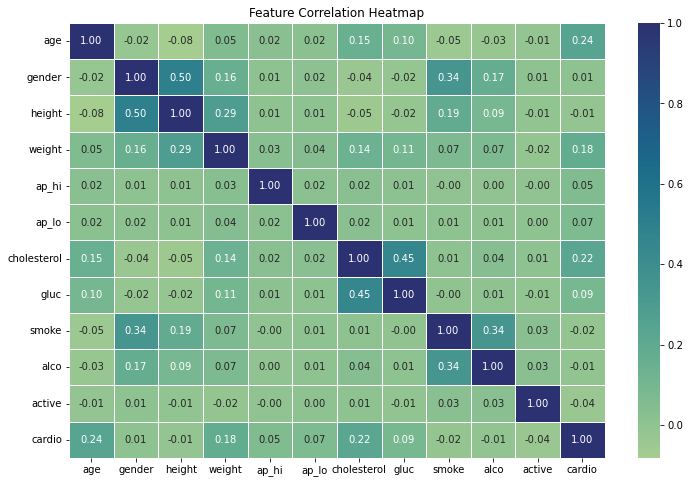

In [8]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='crest', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [27]:
import xgboost as xgb
from catboost import Pool
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
import shap
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import KFold, cross_val_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import pandas as pd

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the features and the target variable
X = data.drop('cardio', axis=1)  # Features (all columns except 'cardio')
y = data['cardio']  # Target variable (the 'cardio' column)

# Split the dataset into a training set and a test set with an 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the number of samples in the training and test sets
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 50001
Test set size: 12501


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, KFold

# Function to print classification metrics
def print_classification_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

def cv_accuracy(model, X, y, n_folds=5):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    accuracy = cross_val_score(model, X, y, scoring="accuracy", cv=kf)
    return accuracy


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import KFold, cross_val_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import pandas as pd

# 10 Fold Cross validation
kf = KFold(n_splits=10, random_state=42, shuffle=True)

cv_scores = []
cv_std = []

baseline_models = ['Logistic_Reg.', 'Gaussian_NB', 'LGBM_Classifier', 'SVC',
                   'Dec_Tree_Classifier', 'Random_Forest_Classifier', 'XGB_Classifier',
                   'Grad_Boost_Classifier', 'Cat_Boost_Classifier', 'Stacked_Classifier']

def cv_accuracy(model):
    accuracy = cross_val_score(model, X_train, y_train, scoring="accuracy", cv=kf)
    return accuracy

# Logistic Regression
logreg = LogisticRegression()
score_logreg = cv_accuracy(logreg)
cv_scores.append(score_logreg.mean())
cv_std.append(score_logreg.std())

# Gaussian Naive Bayes
gnb = GaussianNB()
score_gnb = cv_accuracy(gnb)
cv_scores.append(score_gnb.mean())
cv_std.append(score_gnb.std())

# Light Gradient Boosting Classifier
lgbm = LGBMClassifier()
score_lgbm = cv_accuracy(lgbm)
cv_scores.append(score_lgbm.mean())
cv_std.append(score_lgbm.std())

# Support Vector Classifier
svc = SVC()
score_svc = cv_accuracy(svc)
cv_scores.append(score_svc.mean())
cv_std.append(score_svc.std())

# Decision Tree Classifier
dtc = DecisionTreeClassifier()
score_dtc = cv_accuracy(dtc)
cv_scores.append(score_dtc.mean())
cv_std.append(score_dtc.std())

# Random Forest Classifier
rfc = RandomForestClassifier()
score_rfc = cv_accuracy(rfc)
cv_scores.append(score_rfc.mean())
cv_std.append(score_rfc.std())

# XGB Classifier
xgb = XGBClassifier()
score_xgb = cv_accuracy(xgb)
cv_scores.append(score_xgb.mean())
cv_std.append(score_xgb.std())

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
score_gbc = cv_accuracy(gbc)
cv_scores.append(score_gbc.mean())
cv_std.append(score_gbc.std())

# Cat Boost Classifier
catb = CatBoostClassifier(verbose=0)
score_catb = cv_accuracy(catb)
cv_scores.append(score_catb.mean())
cv_std.append(score_catb.std())

# Stacked Classifier
stack_gen = StackingClassifier(estimators=[
    ('CatBoost', CatBoostClassifier(verbose=0)),
    ('Logistic_Reg', LogisticRegression()),
    ('Gaussian_NB', GaussianNB()),
    ('Grad_Boost', GradientBoostingClassifier())],
    final_estimator=CatBoostClassifier(verbose=0))

score_stack_gen = cv_accuracy(stack_gen)
cv_scores.append(score_stack_gen.mean())
cv_std.append(score_stack_gen.std())

final_cv_score = pd.DataFrame(baseline_models, columns=['Classifiers'])
final_cv_score['Accuracy_mean'] = cv_scores
final_cv_score['Accuracy_std'] = cv_std

print(final_cv_score)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

                Classifiers  Accuracy_mean  Accuracy_std
0             Logistic_Reg.       0.693234      0.005371
1               Gaussian_NB       0.573472      0.014417
2           LGBM_Classifier       0.734246      0.005379
3                       SVC       0.595893      0.001863
4       Dec_Tree_Classifier       0.635913      0.006642
5  Random_Forest_Classifier       0.723671      0.003661
6            XGB_Classifier       0.731270      0.004863
7     Grad_Boost_Classifier       0.735258      0.005134
8      Cat_Boost_Classifier       0.734603      0.005274
9        Stacked_Classifier       0.734345      0.005967


In [56]:
final_cv_score

,Classifiers,Accuracy_mean,Accuracy_std
0,Logistic_Reg.,0.693234,0.005371
1,Gaussian_NB,0.573472,0.014417
2,LGBM_Classifier,0.734246,0.005379
3,SVC,0.595893,0.001863
4,Dec_Tree_Classifier,0.635913,0.006642
5,Random_Forest_Classifier,0.723671,0.003661
6,XGB_Classifier,0.731270,0.004863
7,Grad_Boost_Classifier,0.735258,0.005134
8,Cat_Boost_Classifier,0.734603,0.005274
9,Stacked_Classifier,0.734345,0.005967


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


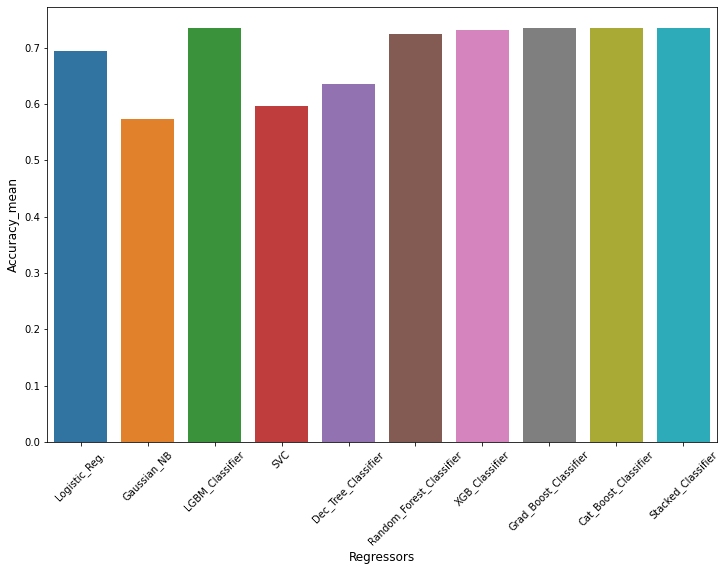

In [58]:
plt.figure(figsize = (12,8))
sns.barplot(final_cv_score['Classifiers'],final_cv_score['Accuracy_mean'])
plt.xlabel('Regressors', fontsize = 12)
plt.ylabel('Accuracy_mean', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

In [29]:
# Split the dataset into a training set and a test set with an 80-20 ratio
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [30]:
# Cat Boost Regressor

cat = CatBoostClassifier()
cat_model = cat.fit(X_train,y_train,
                     eval_set = (X_val,y_val),
                     plot=True,
                     verbose = 0)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [33]:
cat_pred = cat_model.predict(X_test)
cat_score = print_classification_metrics(y_test, cat_pred)
cat_score

Accuracy: 0.7367
Precision: 0.7543
Recall: 0.6902
F1-score: 0.7208


In [34]:
# Features' importance of our model

feat_imp = cat_model.get_feature_importance(prettified=True)
feat_imp

,Feature Id,Importances
0,ap_hi,37.578696
1,age,21.847792
2,cholesterol,13.809076
3,weight,6.952607
4,ap_lo,5.283818
5,gluc,3.759359
6,height,3.108125
7,active,2.860063
8,smoke,2.167680
9,alco,1.549475


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


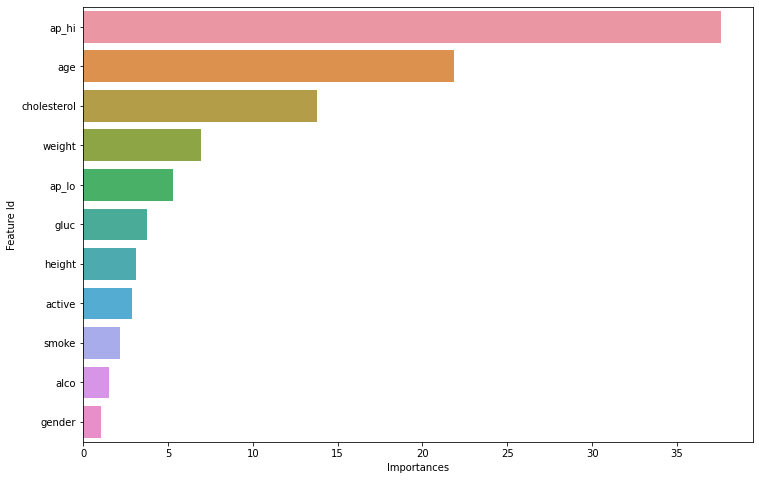

In [35]:
# Plotting top 20 features' importance

plt.figure(figsize = (12,8))
sns.barplot(feat_imp['Importances'],feat_imp['Feature Id'], orient = 'h')
plt.show()

In [36]:
# Feature importance Interactive Plot 

train_pool = Pool(X_train)
val_pool = Pool(X_val)

explainer = shap.TreeExplainer(cat_model) # insert your model
shap_values = explainer.shap_values(train_pool) # insert your train Pool object

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:200,:], X_train.iloc[:200,:])

# The plot represents just a slice of the Training data (200 observations)

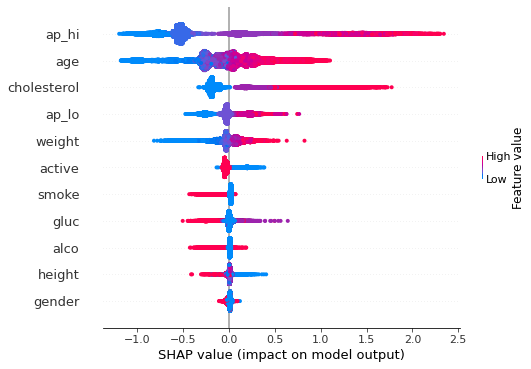

In [37]:
shap.summary_plot(shap_values, X_train)

In [38]:
# Features' Interactions

train_data = Pool(X_train)

interaction = cat_model.get_feature_importance(train_data, type="Interaction")
column_names = X_train.columns.values 
interaction = pd.DataFrame(interaction, columns=["feature1", "feature2", "importance"])
interaction.feature1 = interaction.feature1.apply(lambda l: column_names[int(l)])
interaction.feature2 = interaction.feature2.apply(lambda l: column_names[int(l)])
interaction.head(20)

,feature1,feature2,importance
0,age,ap_hi,9.421323
1,ap_hi,cholesterol,7.764632
2,weight,ap_hi,5.256902
3,age,weight,4.572004
4,age,cholesterol,4.513425
5,age,ap_lo,3.769758
6,ap_hi,ap_lo,3.703142
7,height,ap_hi,3.683665
8,weight,ap_lo,3.639721
9,age,gluc,3.387435


In [39]:
# Preforming a Random Grid Search to find the best combination of parameters
grid = {
    'iterations': [1000, 6000],
    'learning_rate': [0.05, 0.005, 0.0005],
    'depth': [4, 6, 10],
    'l2_leaf_reg': [1, 3, 5, 9],
}

final_model = CatBoostClassifier(random_seed=42, verbose=False)
randomized_search_result = final_model.randomized_search(
    grid,
    X=X_train,
    y=y_train,
    verbose=False,
    plot=True
)

# Display the best parameters found by the randomized search
print("Best parameters found:", randomized_search_result['params'])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.6080831442
bestIteration = 999


bestTest = 0.6081840371
bestIteration = 999


bestTest = 0.5495768156
bestIteration = 999


bestTest = 0.5471985973
bestIteration = 2921


bestTest = 0.5471157641
bestIteration = 241


bestTest = 0.5471599293
bestIteration = 196


bestTest = 0.5491284084
bestIteration = 78


bestTest = 0.5490418511
bestIteration = 75


bestTest = 0.5483477945
bestIteration = 851


bestTest = 0.5485018911
bestIteration = 861

Training on fold [0/3]

bestTest = 0.5482320692
bestIteration = 326

Training on fold [1/3]

bestTest = 0.5485809616
bestIteration = 275

Training on fold [2/3]

bestTest = 0.5471307399
bestIteration = 275

Best parameters found: {'depth': 4, 'l2_leaf_reg': 9, 'iterations': 6000, 'learning_rate': 0.05}


In [40]:
# Final Cat-Boost Regressor

params = {'iterations': 6000,
          'learning_rate': 0.05,
          'depth': 4,
          'l2_leaf_reg': 9,
          'eval_metric':'Accuracy',
          'random_seed': 42}
         
cat_f = CatBoostClassifier(**params)
cat_model_f = cat_f.fit(X_train,y_train,
                     eval_set = (X_val,y_val),
                     plot=True,
                     verbose = False)

catf_pred = cat_model_f.predict(X_val)
catf_score = print_classification_metrics(y_val, catf_pred)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Accuracy: 0.7315
Precision: 0.7432
Recall: 0.6835
F1-score: 0.7121


In [41]:
# Assuming your trained CatBoost model is named "final_model"
final_model.save_model("catboost_model.cbm")

In [42]:
print("Model feature names:", cat_model_f.feature_names_)

Model feature names: ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
